In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

import sys
sys.path.append('../pymoc')
from moc import MOC

First, we retrieve the MOC for VizieR table VIII/84/7c

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


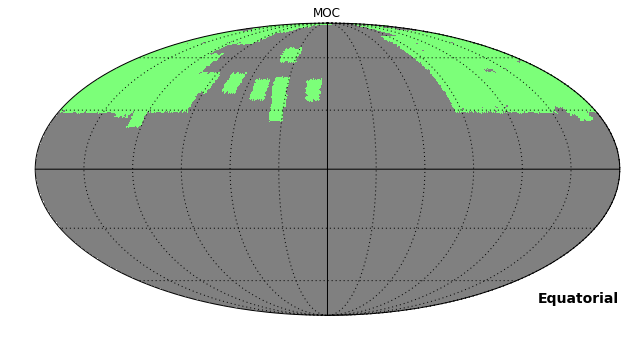

In [25]:
moc = MOC.from_vizier_table('VIII/84/7c', nside=64)
moc.plot(coord='C')

Then, we query Hipparcos catalogue to get all sources in the MOC coverage

In [26]:
#table = moc.query_simbad(10000)
table = moc.query_vizier_table('I/239/hip_main', max_rows=100000)
print table

 _RAJ2000   _DEJ2000   HIP      RAhms    ...   pmDE   e_Plx   B-V   Notes
   deg        deg                        ... mas / yr  mas    mag        
---------- ---------- ------ ----------- ... -------- ------ ------ -----
  1.546869  87.889424    513 00 06 11.39 ...    15.82   1.20  1.000      
  4.022277  88.401193   1284 00 16 05.24 ...    -6.55   0.79  0.230      
  4.470130  44.577946   1434 00 17 52.81 ...    -0.41   0.94  1.029      
  4.582350  44.558412   1474 00 18 19.77 ...   -11.06   0.90  1.608      
  4.595356  44.022953   1475 00 18 20.54 ...   410.58   1.05  1.560      
  4.669592  44.629989   1496 00 18 40.72 ...   -14.02   0.75  0.115      
  4.675704  43.791141   1501 00 18 42.15 ...    -2.72   0.78 -0.074      
  4.975071  44.709416   1593 00 19 54.03 ...    -9.28   1.28  1.600      
  5.132547  43.694279   1641 00 20 31.82 ...   -19.30   0.95  0.174      
  5.137508  45.508927   1642 00 20 32.94 ...   -21.95   1.02  0.563      
       ...        ...    ...         .

Finally, we plot the positions of the sources in the table to check if they lie in the MOC coverage

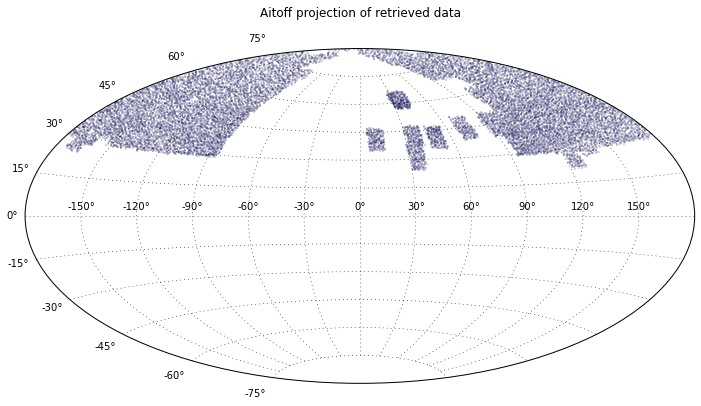

In [27]:
from astropy.coordinates import SkyCoord


c = SkyCoord(ra=table['_RAJ2000'], dec=table['_DEJ2000'], frame='icrs')

ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian

plt.figure(figsize=(12,8))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff projection of retrieved data", y=1.08)
plt.grid(True)
plt.plot(ra_rad, dec_rad, 'o', markersize=1, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()